# Exploratory Data Analysis

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.kernel_ridge import KernelRidge

In [97]:
# list current working directory
! ls

LICENSE                         exploratory_data_analysis.ipynb
README.md                       models.py
__pycache__                     parse.py
data                            reviews
docs


In [98]:
data = pd.read_csv('data/listings_first_concat_clean.csv')

In [99]:
data.head()

,Unnamed: 0,host_is_superhost,host_total_listings_count,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,fire extinguisher,pool,suitable for events,tv,heating,safety card,shampoo,carbon monoxide detector,pets live on this property,washer
0,0,0,3,34,0,1,4,1.0,1,1,...,0,0,0,1,1,0,0,0,0,1
1,1,1,6,34,0,1,4,1.0,1,1,...,1,0,0,1,1,1,0,1,0,1
2,2,0,2,34,9,1,11,4.5,5,7,...,0,0,0,1,1,0,1,1,1,1
3,3,0,1,34,0,1,3,1.0,0,2,...,1,0,0,0,1,1,1,1,0,1
4,4,0,2,34,9,1,6,2.0,3,3,...,1,0,0,1,1,0,1,1,0,0


In [100]:
sorted(list(data.columns))

['24-hour check-in',
 'Unnamed: 0',
 'accommodates',
 'air conditioning',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'breakfast',
 'buzzer/wireless intercom',
 'cable tv',
 'cancellation_policy',
 'carbon monoxide detector',
 'cat(s)',
 'dog(s)',
 'doorman',
 'dryer',
 'elevator in building',
 'essentials',
 'family/kid friendly',
 'fire extinguisher',
 'first aid kit',
 'free parking on premises',
 'guests_included',
 'gym',
 'hair dryer',
 'hangers',
 'heating',
 'host_is_superhost',
 'host_total_listings_count',
 'hot tub',
 'indoor fireplace',
 'internet',
 'iron',
 'kitchen',
 'laptop friendly workspace',
 'lock on bedroom door',
 'minimum_nights',
 'neighbourhood',
 'number_of_reviews',
 'other pet(s)',
 'pets allowed',
 'pets live on this property',
 'pool',
 'price',
 'property_type',
 'review_scores_rating',
 'reviews_per_month',
 'room_type',
 'safety card',
 'shampoo',
 'smoke detector',
 'smoking allowed',
 'suitable for events',
 'tv',
 'washer',
 'washer / dryer',


In [101]:
# drop 'Unnamed: 0' and 'id'
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [103]:
data.head()

,host_is_superhost,host_total_listings_count,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,fire extinguisher,pool,suitable for events,tv,heating,safety card,shampoo,carbon monoxide detector,pets live on this property,washer
0,0,3,34,0,1,4,1.0,1,1,3,...,0,0,0,1,1,0,0,0,0,1
1,1,6,34,0,1,4,1.0,1,1,3,...,1,0,0,1,1,1,0,1,0,1
2,0,2,34,9,1,11,4.5,5,7,3,...,0,0,0,1,1,0,1,1,1,1
3,0,1,34,0,1,3,1.0,0,2,3,...,1,0,0,0,1,1,1,1,0,1
4,0,2,34,9,1,6,2.0,3,3,3,...,1,0,0,1,1,0,1,1,0,0


In [104]:
one_hot_encoding = pd.get_dummies(data['neighbourhood'], prefix='neighbourhood_')
data = pd.concat([data, one_hot_encoding], axis=1).drop(['neighbourhood'], axis=1, inplace=False)

In [105]:
data.head()

,host_is_superhost,host_total_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,...,neighbourhood__77,neighbourhood__78,neighbourhood__79,neighbourhood__80,neighbourhood__81,neighbourhood__82,neighbourhood__83,neighbourhood__84,neighbourhood__85,neighbourhood__86
0,0,3,0,1,4,1.0,1,1,3,85.0,...,0,0,0,0,0,0,0,0,0,0
1,1,6,0,1,4,1.0,1,1,3,150.0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,9,1,11,4.5,5,7,3,975.0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,3,1.0,0,2,3,100.0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,9,1,6,2.0,3,3,3,450.0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
for c in data.columns:
    print('feature name:', c)
    print('category number:', data[c].value_counts().shape[0], '\n')

feature name: host_is_superhost
category number: 2 

feature name: host_total_listings_count
category number: 27 

feature name: property_type
category number: 16 

feature name: room_type
category number: 3 

feature name: accommodates
category number: 15 

feature name: bathrooms
category number: 12 

feature name: bedrooms
category number: 8 

feature name: beds
category number: 11 

feature name: bed_type
category number: 5 

feature name: price
category number: 272 

feature name: guests_included
category number: 15 

feature name: minimum_nights
category number: 22 

feature name: number_of_reviews
category number: 193 

feature name: review_scores_rating
category number: 43 

feature name: cancellation_policy
category number: 3 

feature name: reviews_per_month
category number: 655 

feature name: internet
category number: 2 

feature name: 24-hour check-in
category number: 2 

feature name: other pet(s)
category number: 2 

feature name: pets allowed
category number: 2 

featur

In [107]:
for c in data.columns:
    category_num = data[c].value_counts().shape[0]
    if category_num > 20:
        print('feature name:', c)
        print('category number:', data[c].value_counts().shape[0], '\n')

feature name: host_total_listings_count
category number: 27 

feature name: price
category number: 272 

feature name: minimum_nights
category number: 22 

feature name: number_of_reviews
category number: 193 

feature name: review_scores_rating
category number: 43 

feature name: reviews_per_month
category number: 655 



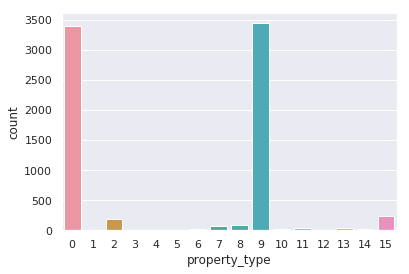

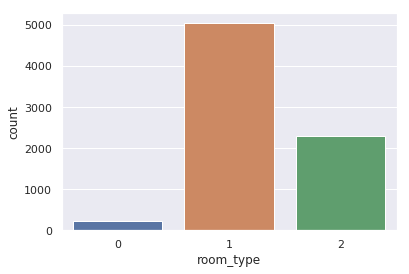

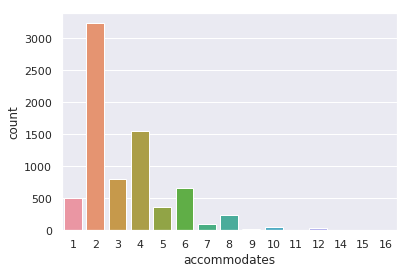

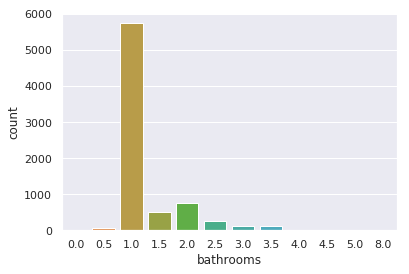

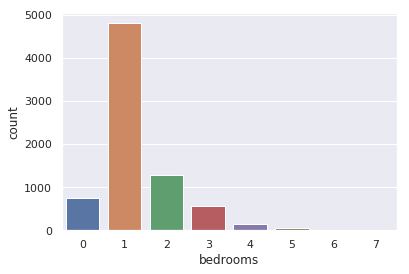

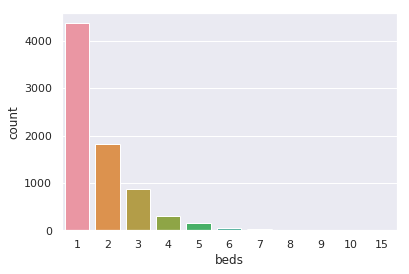

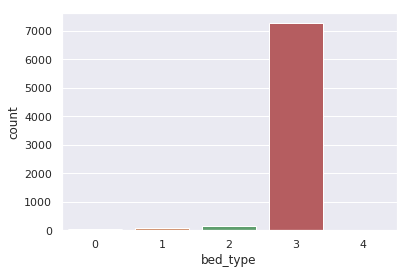

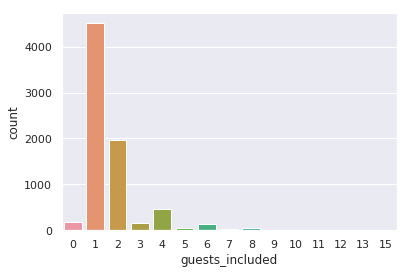

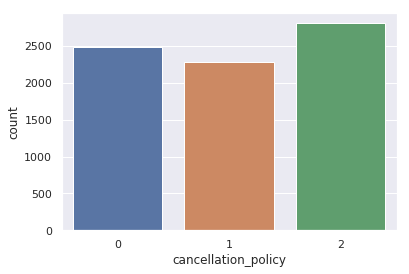

In [108]:
sns.set(style="darkgrid")

for c in data.columns:
    category_num = data[c].value_counts().shape[0]
    # select non-binary features and features without too many categories
    if category_num != 2 and category_num < 20:
        ax = sns.countplot(x=c, data=data)
        plt.show()

In [109]:
y = data['price']
X = data.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
X.shape

(7586, 143)

In [111]:
# regularization bench mark
clf = RandomForestRegressor(n_estimators=300, criterion='mae', max_features='sqrt', max_depth=None, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [113]:
print('training R^2 score:', clf.score(X_train, y_train))
print('test R^2 score:    ', clf.score(X_test, y_test))

training R^2 score: 0.966588788614005
test R^2 score:     0.8130537122832451


In [ ]:
# increase max_features a little bit (increase too much will reduce test accuracy)
clf_trial = RandomForestRegressor(n_estimators=300, criterion='mae', 
                                  max_features=14, max_depth=None, 
                                  n_jobs=-1, oob_score=True)
clf_trial.fit(X_train, y_train)

In [ ]:
print('training R^2 score:', clf_trial.score(X_train, y_train))
print('test R^2 score:    ', clf_trial.score(X_test, y_test))